In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/toxic_comments.csv', engine='python')

In [3]:
print(df.dtypes)

Unnamed: 0                               int64
id                                       int64
target                                 float64
comment_text                            object
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float64
jewish                                 float64
latino       

In [4]:
comment = df['comment_text']
print(comment.head())
comment = comment.values

0                 haha you guys are a bunch of losers.
1                                 ur a sh*tty comment.
2    It's ridiculous that these guys are being call...
3    This story gets more ridiculous by the hour! A...
4    Angry trolls, misogynists and Racists", oh my....
Name: comment_text, dtype: object


In [5]:
label = df[['severe_toxicity' , 'obscene' , 'threat' , 'insult' , 'identity_attack']]
print(label.head())
label = label.values

   severe_toxicity   obscene  threat    insult  identity_attack
0         0.021277  0.000000     0.0  0.872340         0.021277
1         0.047619  0.638095     0.0  0.333333         0.000000
2         0.000000  0.100000     0.1  0.600000         0.000000
3         0.000000  0.000000     0.0  0.300000         0.000000
4         0.000000  0.000000     0.0  0.500000         0.100000


average length of comment: 277.613


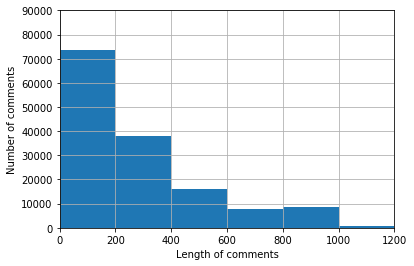

In [6]:
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

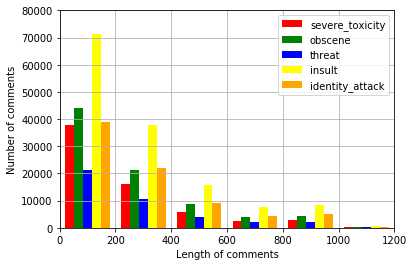

In [7]:
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l

labelsplt = ['severe_toxicity' , 'obscene' , 'threat' , 'insult' , 'identity_attack']
color = ['red','green','blue','yellow','orange']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 80000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

## Trimming our data
More data isn't always the best for Machine Learning. Excess data can increase time to train but decrease accuracy. Lets see how many comments we have.

In [18]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    comments.append(comment[ix])
    labels.append(label[ix])

labels = np.asarray(labels)
print(len(comments))

144334


It looks like we have 144,334 comments total.

Let's see how many comments we'd have if we limited comments to 400 characters

In [19]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        labels.append(label[ix])
        
labels = np.asarray(labels)
print(len(comments))

111634


It seems that we only removed 33,000 comments by limiting our character count. This means we still retained 77.34% of our data.

## Preparing the Data

Since we don't care about punctuation, let's get rid of it. Let's take a look at what python considers punctuation.

In [29]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Seem's like a good start. Let's add more things we'd want to ignore

In [30]:
punctuation_edit = string.punctuation.replace('\'','')+"0123456789"
print (punctuation_edit)

!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


Let's map each character in the punctuation_edit into the character at the same position in the outtab string with maketrans() i.e. it replaces every character in the removal list with a space, since outtab contains a string with spaces.

In [31]:
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

Now we don't don't care about common words either. Python knows these words as "stop_words"

In [32]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

print (stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

Words have many different forms. However, we dont' want to treat these words any differently. So we need to stem and lemmatize words.

i.e. stems, stemmed, stemming, stemmer all point back to the word 'stem'

In [33]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liamormiston/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Now let's loop through our comments and apply our changes we want to make. (Punctuation removal, Split words by space, Stem, and Lemmatize)

In [34]:
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab)
    l = []
    for word in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)

All we need to do now is convert our comments into a matrix of token counts. This will count the number of times each word occurs!

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

#create object supplying our custom stop words
count_vector = CountVectorizer(stop_words=stop_words)
#fitting it to converts comments into bag of words format
tf = count_vector.fit_transform(comments).toarray()
print(tf.shape)

(111634, 38847)


So out of our 111634 comments, we have 38847 words from toxic comments.

Next, we need to give these words weight since we know that they are more likely to appear in toxic comments. We could also add words that were rated non-toxic to our stop_words array to further eliminate words that aren't toxic from our toxic word array.